In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import os

# Preparing the Data-set

In [ ]:
data_dir= '/content/drive/MyDrive/Bangkit_Academy/Model/Dataset/Image'

## Prepare the training data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.2)



In [ ]:
train_generator = train_datagen.flow_from_directory(
        data_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        class_mode='binary', # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        data_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
        class_mode='binary',
        subset='validation')

Found 125 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('/content/drive/MyDrive/Bangkit_Academy/Model/model/label.txt', 'w') as f:
  f.write(labels)

{'Bon': 0, 'Bukan Bon': 1}


In [ ]:
!cat /content/drive/MyDrive/Bangkit_Academy/Model/model/label.txt

Bon
Bukan Bon

## Build the model

In [ ]:
IMG_SHAPE = (150, 150, 3)

# Create the base model from the pre-trained MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False,
                                              weights='imagenet')
base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.models.Sequential([
    base_model,
    # tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    # tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_4 (Flatten)         (None, 32000)             0         
                                                                 
 dense_8 (Dense)             (None, 32)                1024032   
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3282049 (12.52 MB)
Trainable params: 1024065 (3.91 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
epochs=5
# latih model dengan model.fit
history = model.fit(
            train_generator,
            # steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
            epochs=epochs, # tambahkan epochs jika akurasi model belum optimal
            validation_data=validation_generator # menampilkan akurasi pengujian data validasi
            # validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
            # verbose=2)
)

Epoch 1/5
32/32 [==============================] - 9s 166ms/step - loss: 0.6067 - accuracy: 0.9440 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 2/5
32/32 [==============================] - 4s 128ms/step - loss: 0.1894 - accuracy: 0.9840 - val_loss: 0.6648 - val_accuracy: 0.9667
Epoch 3/5
32/32 [==============================] - 5s 142ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 4.1435e-07 - val_accuracy: 1.0000
Epoch 4/5
32/32 [==============================] - 7s 211ms/step - loss: 0.0181 - accuracy: 0.9920 - val_loss: 0.3213 - val_accuracy: 0.9667
Epoch 5/5
32/32 [==============================] - 5s 145ms/step - loss: 2.9835e-06 - accuracy: 1.0000 - val_loss: 4.5151e-09 - val_accuracy: 1.0000


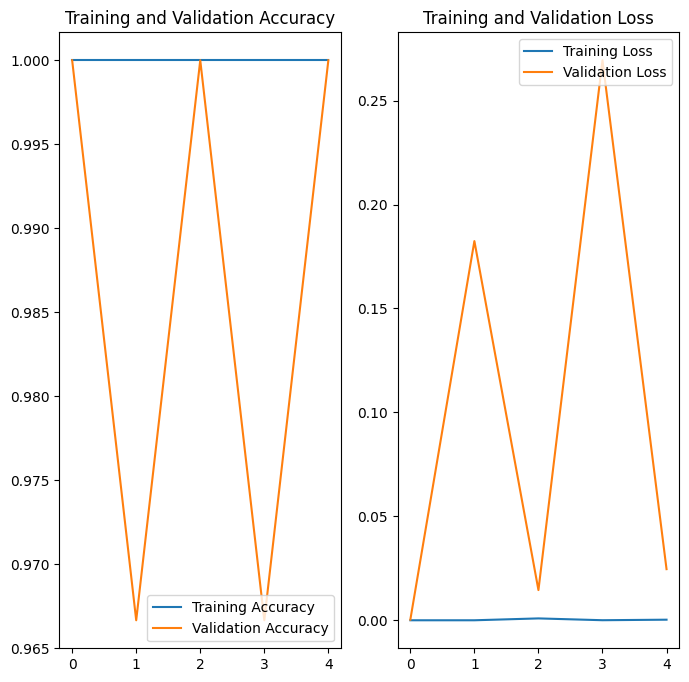

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(validation_generator, verbose=1)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

8/8 [==============================] - 1s 142ms/step - loss: 0.5349 - accuracy: 0.9333
Test Accuracy: 0.9333333373069763
Test Loss: 0.5349481701850891


## Fine tune the base model, Un-freeze more layers

In [ ]:
print("Number of layers in the base model: ", len(model.layers))

Number of layers in the base model:  4


In [ ]:
model.trainable = True
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in model.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_3 (Flatten)         (None, 32000)             0         
                                                                 
 dense_6 (Dense)             (None, 16)                512016    
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2770017 (10.57 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 2770017 (10.57 MB)
_________________________________________________________________


In [ ]:
print('Number of trainable weights = {}'.format(len(model.trainable_weights)))


Number of trainable weights = 0


In [ ]:
history_fine = model.fit(train_generator,
                         epochs=5,
                         validation_data=validation_generator)

Epoch 1/5
32/32 [==============================] - 18s 236ms/step - loss: 2.3445e-05 - accuracy: 1.0000 - val_loss: 0.2168 - val_accuracy: 0.9667
Epoch 2/5
32/32 [==============================] - 4s 123ms/step - loss: 2.8556e-05 - accuracy: 1.0000 - val_loss: 0.0328 - val_accuracy: 0.9667
Epoch 3/5
32/32 [==============================] - 6s 186ms/step - loss: 2.5781e-04 - accuracy: 1.0000 - val_loss: 0.3928 - val_accuracy: 0.9333
Epoch 4/5
32/32 [==============================] - 5s 142ms/step - loss: 5.2441e-05 - accuracy: 1.0000 - val_loss: 0.2211 - val_accuracy: 0.9667
Epoch 5/5
32/32 [==============================] - 6s 185ms/step - loss: 1.4377e-04 - accuracy: 1.0000 - val_loss: 0.1489 - val_accuracy: 0.9667


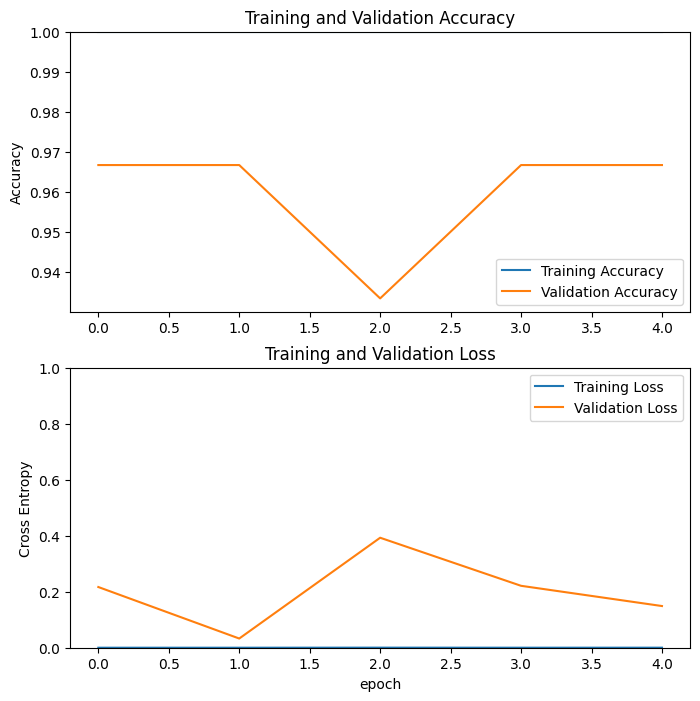

In [ ]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Save Model

In [ ]:

MODEL_BASE_PATH = "/content/drive/MyDrive/Bangkit_Academy/Dataset"
PROJECT_NAME = "model"
SAVE_MODEL_NAME = "bill.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At /content/drive/MyDrive/Bangkit_Academy/Dataset/model/bill.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Convert to TFLite

In [ ]:
# A generator that provides a representative dataset
def representative_data_gen():
  dataset_list = tf.data.Dataset.list_files(data_dir + '/*/*')
  for i in range(100):
    image = next(iter(dataset_list))
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [150, 150])
    image = tf.cast(image / 255., tf.float32)
    image = tf.expand_dims(image, 0)
    yield [image]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
# This enables quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# This sets the representative dataset for quantization
converter.representative_dataset = representative_data_gen
# This ensures that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# For full integer quantization, though supported types defaults to int8 only, we explicitly declare it for clarity.
converter.target_spec.supported_types = [tf.int8]
# These set the input and output tensors to uint8 (added in r2.3)
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8
tflite_model = converter.convert()

with open('/content/drive/MyDrive/Bangkit_Academy/Dataset/model/model.tflite', 'wb') as f:
  f.write(tflite_model)

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [ ]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

input:  <class 'numpy.uint8'>
output:  <class 'numpy.uint8'>


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  if classes==0:
   print('Bon')
  else:
   print('Bukan Bon')

# Convert pickle

In [ ]:
import pickle
#  simpan model
with open("/content/drive/MyDrive/Bangkit_Academy/Dataset/model/model_klasifikasi.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

#Testing tflite

In [ ]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/Bangkit_Academy/Dataset/model/model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.uint8)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

# Test Image